## Using MDTraj Library

### by Andrew Mytko

#### 2015-09-12

ЗАДАЧА: Прочитать файл формата XTC и построить анимацию движения атомов этого файла.

In [1]:
# Запуск кода, обеспчивающего анимацию внутри (inline) блокнота путём сохранения во временный файл на компьюетере
# и отображения через HTML - занимает место и время.

%run Embedded_Animation.ipynb

Импорт библиотек для отображения графиков и анимации.

In [2]:
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Импорт библиотеки MDTraj для анализа траекторий (http://mdtraj.org).

In [3]:
import mdtraj

Стандартный способ анализа траекторий согласно документации библиотеки (аналогично MDAnalysis) - использование двух файлов: топологии и траектории. В топологии содержится информация о самих атомах, а в траектории - только координаты движения каждого атома по кадрам и временные промежутки между ними.

В данной задаче имеется только файл траектории (XTC).
Поэтому используется только интерфейс для работы с XTC-файлом.

In [4]:
path = 'traj_120bar_640K.xtc'
xtc = mdtraj.formats.XTCTrajectoryFile(path)

In [5]:
%time file_len=len(xtc) # пробег по всем кадрам файла

CPU times: user 5.73 s, sys: 68 ms, total: 5.8 s
Wall time: 5.77 s


Время первого пробега по кадрам у MDAnalysis и MDTraj - примерно одинаковое согласно проведённым [мной] тестам.

In [6]:
xtc.seek(0) # возвращение к первому кадру
xyz = xtc.read(1)[0][0]
len(xyz) # количество атомов

180000

Инициализация фигуры и осей для работы с графиком.

In [7]:
%matplotlib inline

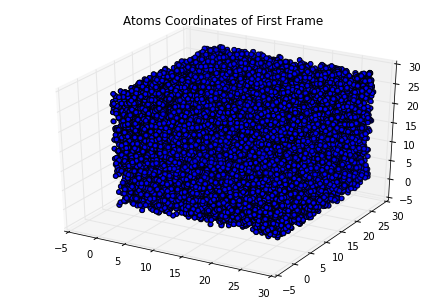

In [8]:
fig = plt.figure()
ax = p3.Axes3D(fig)

ax.set_title("Atoms Coordinates of First Frame")
(lambda c: ax.scatter3D(c[0],c[1],c[2]))(np.transpose(xyz))

Создание графиков для каждого атома в виде точки (для последущего изменения координат).
Отобразим первые 1000 атомов из 18000.

In [9]:
first_n = 10000
points = [ax.plot([], [], [],'go')[0] for i in range(first_n)]

Функции инициализации и обновления данных для анимации.

In [10]:
def init():
    """ Animation initialization function.
        Seeks first frame in XTC-file and reads it.
        Initializes coordiantes of atoms to draw.
    """
    xtc.seek(0)
    xyz, fr = map(lambda x: x[0],xtc.read(1)[0:2]) # there are some other data in one xtc-frame
    fig.suptitle('First %d of 180.000 Atoms Dynamic (%s)\nFrame %d of %d' %(first_n,path,fr,file_len))
    for k in range(first_n):
        points[k].set_data(xyz[k,0], xyz[k,1])
        points[k].set_3d_properties(xyz[k,2])
    return points    

In [11]:
def update(i):
    """ Animation updating function.
        Reads next frame and updates coordiantes of atoms.
    """
    xyz, fr = map(lambda x: x[0],xtc.read(1)[0:2]) # there are some other data in one xtc-frame
    fig.suptitle('First %d of 180.000 Atoms Dynamic (%s)\nFrame %d of %d' %(first_n,path,fr,file_len))
    for k in range(first_n):
        points[k].set_data(xyz[k,0], xyz[k,1])
        points[k].set_3d_properties(xyz[k,2])
    return points

Настройка графических параметров.

In [12]:
ax.set_xlim3d([-5, 40])
ax.set_xlabel('X')

ax.set_ylim3d([-5, 40])
ax.set_ylabel('Y')

ax.set_zlim3d([-5, 40])
ax.set_zlabel('Z')

Создание объекта анимации.

In [13]:
mol_ani = animation.FuncAnimation(fig, func=update, init_func=init, frames=416, interval=20, blit=False)

Анимация.

Анимация движения атомов по кадрам доступна по ссылке https://drive.google.com/file/d/0B9n653m4f88BMXkxZEJXb2pwSEE/view?usp=sharing

In [14]:
# # Для записи видео в файл
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=10, bitrate=1800)
# mol_ani.save('traj.mp4', writer=writer)

In [15]:
plt.show(mol_ani)

In [19]:
# Для отображения анимации внутри (inline) документа можно использовать следующую функцию 
# после запуска Embedded_Animation.ipynb

# display_animation(mol_ani)